# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from collections import Counter
from imblearn.over_sampling import SMOTE
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score


# Read CSV File

In [2]:
df = pd.read_excel('dataset-for-mendeley-181220.xlsx')

In [3]:
df.head(5)

,Gender,Age as of Academic Year 17/18,Current Year (17/18),Proposed Year/Grade (18/19),Year of Admission,Previous Curriculum (17/18)2,Current School,Current Curriculum,Previous year/Grade,Math-exam,...,Math20-1',Science20-1',English20-1',Math20-2',Science20-2',English20-2',Math20-3',Science20-3',English20-3',Label
0,Male,4,KG1,KG2,School 1 Current Student,American,School 1,American,Grade System,81.0,...,64.0,62.0,87.0,69.0,98.0,84.0,80.0,98.0,81.0,80.166667
1,Male,4,KG1,KG2,School 1 Current Student,American,School 1,American,Grade System,66.0,...,60.0,84.0,89.0,74.0,96.0,70.0,82.0,71.0,99.0,75.888889
2,Male,4,KG1,KG2,School 1 Current Student,American,School 1,American,Grade System,90.0,...,84.0,72.0,88.0,93.0,84.0,74.0,91.0,85.0,86.0,79.166667
3,Female,4,KG1,KG2,School 1 Current Student,American,School 1,American,Grade System,84.0,...,66.0,83.0,95.0,85.0,99.0,75.0,73.0,84.0,85.0,76.000000
4,Male,3,KG1,KG2,School 1 Current Student,American,School 1,American,Grade System,85.0,...,70.0,61.0,85.0,97.0,82.0,75.0,82.0,86.0,69.0,73.444444


In [4]:
df.describe()

,Age as of Academic Year 17/18,Math-exam,Science-exam',English-exam',Math19-1',Science19-1',English19-1',Math19-2',Science19-2',English19-2',...,Math20-1',Science20-1',English20-1',Math20-2',Science20-2',English20-2',Math20-3',Science20-3',English20-3',Label
count,1549.000000,1549.000000,1546.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,...,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,8.045190,73.387992,72.707309,75.417689,78.180310,79.351969,79.085087,80.067011,79.743060,79.923305,...,80.642737,82.479729,81.096578,82.606779,83.593544,83.302001,84.532343,82.960491,83.625307,81.091676
std,3.358128,12.899540,12.934245,12.142158,15.535625,12.718988,12.145251,14.131375,12.167641,11.707105,...,14.254033,10.693867,10.038541,12.670407,10.160532,9.972429,12.140723,11.669137,10.999809,4.062935
min,3.000000,37.500000,37.500000,37.500000,0.000000,33.300000,33.300000,0.000000,33.300000,33.300000,...,0.000000,33.300000,33.300000,0.000000,33.300000,33.300000,33.300000,33.300000,33.300000,58.444444
25%,5.000000,65.000000,64.000000,68.000000,66.000000,70.000000,71.000000,68.800000,71.000000,71.000000,...,70.000000,76.000000,73.800000,74.700000,78.000000,77.700000,76.800000,76.000000,77.700000,78.277778
50%,7.000000,74.000000,72.500000,75.000000,80.000000,83.000000,83.000000,81.000000,83.000000,83.000000,...,81.400000,85.000000,84.000000,84.500000,85.000000,85.000000,87.000000,85.000000,85.000000,81.222222
75%,10.000000,84.000000,81.000000,84.000000,90.100000,89.000000,88.300000,91.300000,89.000000,88.400000,...,91.300000,90.300000,88.400000,92.000000,90.800000,90.300000,94.800000,91.300000,91.300000,84.027778
max,17.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,91.511111


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         1549 non-null   object 
 1   Age as of Academic Year 17/18  1549 non-null   int64  
 2   Current Year (17/18)           1549 non-null   object 
 3   Proposed Year/Grade (18/19)    1549 non-null   object 
 4   Year of Admission              1549 non-null   object 
 5   Previous Curriculum (17/18)2   1549 non-null   object 
 6   Current School                 1549 non-null   object 
 7   Current Curriculum             1549 non-null   object 
 8   Previous year/Grade            1549 non-null   object 
 9   Math-exam                      1549 non-null   float64
 10  Science-exam'                  1546 non-null   float64
 11  English-exam'                  1549 non-null   float64
 12  Math19-1'                      1549 non-null   f

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='student.html')

C:\Users\ashri\AppData\Local\Temp\ipykernel_56188\1827968675.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Convert Categorical Data to Numerical Data

In [7]:
df['Gender']=LabelBinarizer().fit_transform(df['Gender'])
df['Current Year (17/18)']=LabelBinarizer().fit_transform(df["Current Year (17/18)"])
df['Proposed Year/Grade (18/19)']=LabelBinarizer().fit_transform(df["Proposed Year/Grade (18/19)"])
df['Year of Admission']=LabelBinarizer().fit_transform(df["Year of Admission"])
df['Previous Curriculum (17/18)2']=LabelBinarizer().fit_transform(df["Previous Curriculum (17/18)2"])
df['Current School']=LabelBinarizer().fit_transform(df["Current School"])
df['Current Curriculum']=LabelBinarizer().fit_transform(df["Current Curriculum"])
df['Previous year/Grade']=LabelBinarizer().fit_transform(df["Previous year/Grade"])

# Give Class Names

In [8]:
# create a list of our conditions
conditions = [
    (df['Label'] >= 83) ,
    (df['Label'] >= 79) & (df['Label'] <= 82.99),
    (df['Label'] < 79)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Class'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Gender,Age as of Academic Year 17/18,Current Year (17/18),Proposed Year/Grade (18/19),Year of Admission,Previous Curriculum (17/18)2,Current School,Current Curriculum,Previous year/Grade,Math-exam,...,Science20-1',English20-1',Math20-2',Science20-2',English20-2',Math20-3',Science20-3',English20-3',Label,Class
0,1,4,0,0,0,0,0,0,1,81.0,...,62.0,87.0,69.0,98.0,84.0,80.0,98.0,81.0,80.166667,1
1,1,4,0,0,0,0,0,0,1,66.0,...,84.0,89.0,74.0,96.0,70.0,82.0,71.0,99.0,75.888889,2
2,1,4,0,0,0,0,0,0,1,90.0,...,72.0,88.0,93.0,84.0,74.0,91.0,85.0,86.0,79.166667,1
3,0,4,0,0,0,0,0,0,1,84.0,...,83.0,95.0,85.0,99.0,75.0,73.0,84.0,85.0,76.000000,2
4,1,3,0,0,0,0,0,0,1,85.0,...,61.0,85.0,97.0,82.0,75.0,82.0,86.0,69.0,73.444444,2


In [9]:
df.drop('Label', inplace=True, axis=1)

In [10]:
df.head(5)

,Gender,Age as of Academic Year 17/18,Current Year (17/18),Proposed Year/Grade (18/19),Year of Admission,Previous Curriculum (17/18)2,Current School,Current Curriculum,Previous year/Grade,Math-exam,...,Math20-1',Science20-1',English20-1',Math20-2',Science20-2',English20-2',Math20-3',Science20-3',English20-3',Class
0,1,4,0,0,0,0,0,0,1,81.0,...,64.0,62.0,87.0,69.0,98.0,84.0,80.0,98.0,81.0,1
1,1,4,0,0,0,0,0,0,1,66.0,...,60.0,84.0,89.0,74.0,96.0,70.0,82.0,71.0,99.0,2
2,1,4,0,0,0,0,0,0,1,90.0,...,84.0,72.0,88.0,93.0,84.0,74.0,91.0,85.0,86.0,1
3,0,4,0,0,0,0,0,0,1,84.0,...,66.0,83.0,95.0,85.0,99.0,75.0,73.0,84.0,85.0,2
4,1,3,0,0,0,0,0,0,1,85.0,...,70.0,61.0,85.0,97.0,82.0,75.0,82.0,86.0,69.0,2


In [11]:
df.isna().sum()

Gender                           0
Age as of Academic Year 17/18    0
Current Year (17/18)             0
Proposed Year/Grade (18/19)      0
Year of Admission                0
Previous Curriculum (17/18)2     0
Current School                   0
Current Curriculum               0
Previous year/Grade              0
Math-exam                        0
Science-exam'                    3
English-exam'                    0
Math19-1'                        0
Science19-1'                     0
English19-1'                     0
Math19-2'                        0
Science19-2'                     0
English19-2'                     0
Math19-3'                        0
Science19-3'                     0
English19-3'                     0
Math20-1'                        0
Science20-1'                     0
English20-1'                     0
Math20-2'                        0
Science20-2'                     0
English20-2'                     0
Math20-3'                        0
Science20-3'        

# Remove Null Data

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
df = clean_dataset(df)

In [14]:
df.dtypes

Gender                           float64
Age as of Academic Year 17/18    float64
Current Year (17/18)             float64
Proposed Year/Grade (18/19)      float64
Year of Admission                float64
Previous Curriculum (17/18)2     float64
Current School                   float64
Current Curriculum               float64
Previous year/Grade              float64
Math-exam                        float64
Science-exam'                    float64
English-exam'                    float64
Math19-1'                        float64
Science19-1'                     float64
English19-1'                     float64
Math19-2'                        float64
Science19-2'                     float64
English19-2'                     float64
Math19-3'                        float64
Science19-3'                     float64
English19-3'                     float64
Math20-1'                        float64
Science20-1'                     float64
English20-1'                     float64
Math20-2'       

In [15]:
df['Class']=df['Class'].astype('int32')

In [16]:
df['Class'].value_counts()

1    547
0    522
2    477
Name: Class, dtype: int64

# Apply Pearson's Correlation Coefficient

In [17]:
corr=df.corr()

In [18]:
# scatter plot of examples by class label
X = df.drop(columns = ['Class']) # X contains the features 
y= df['Class']

In [19]:
X.shape

(1546, 30)

In [20]:
y.shape

(1546,)

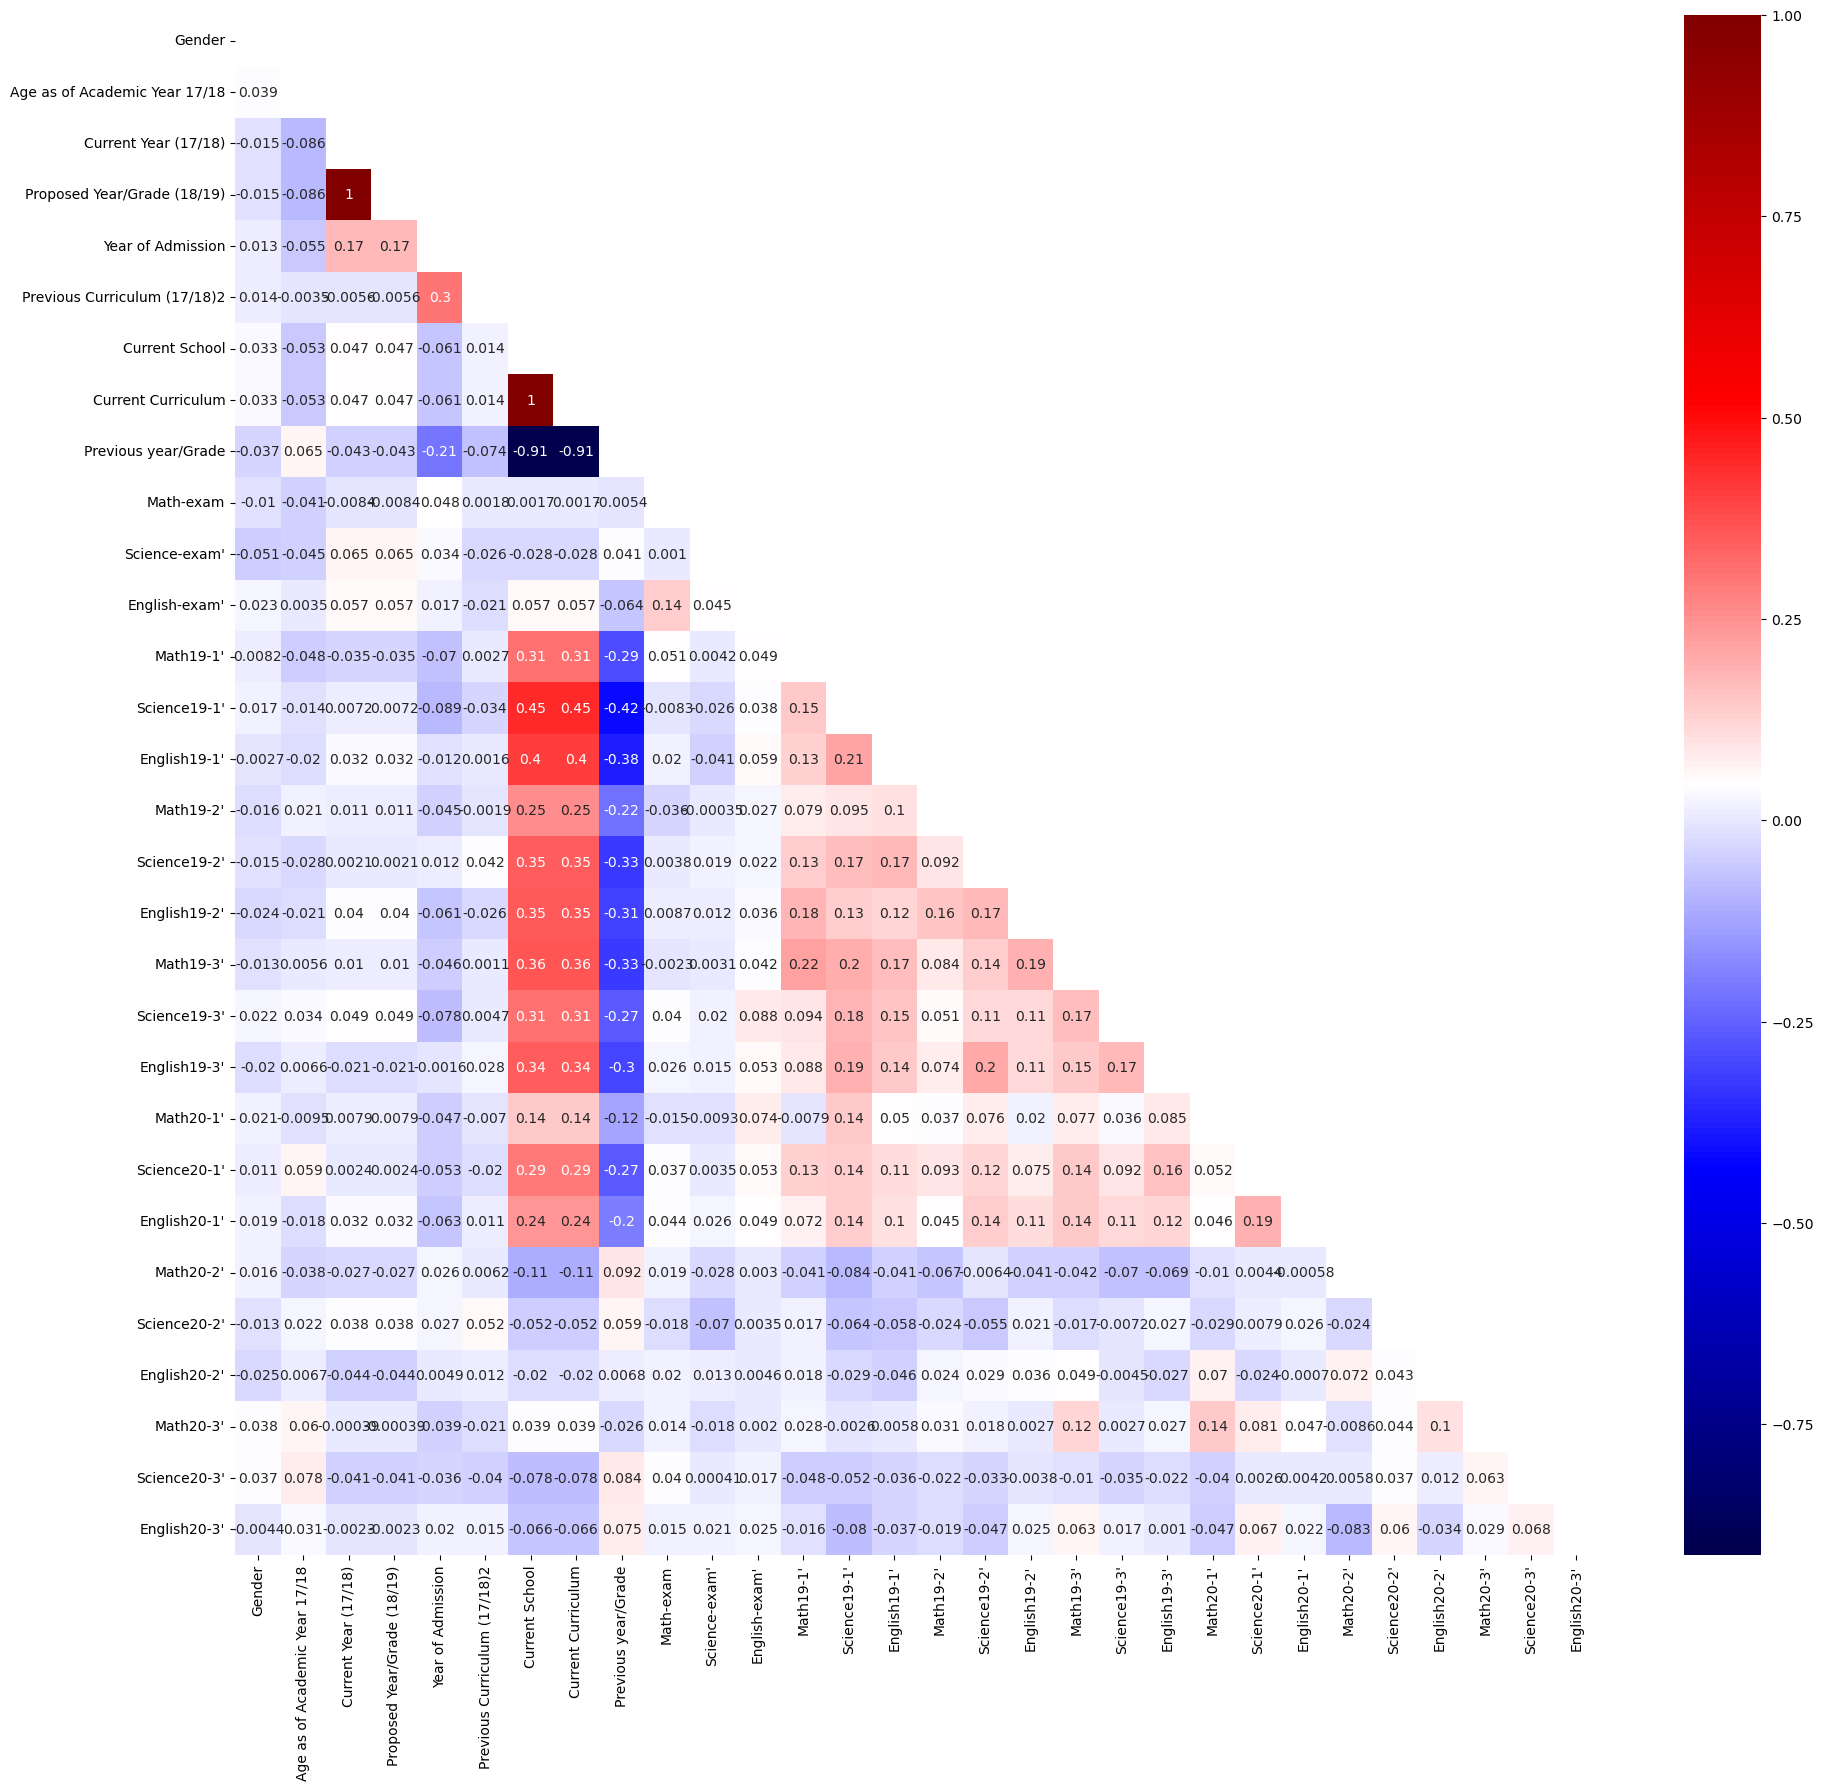

In [21]:
corr = X.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (22,20))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [22]:
# it will remove the first feature that is highly correlated with another feature
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(X, 0.9)
print(len(corr_features))
print(corr_features)

3
{'Current Curriculum', 'Proposed Year/Grade (18/19)', 'Previous year/Grade'}


In [24]:
#Droping simillar features
X = X.drop(columns = corr_features)
print(X.shape)

(1546, 27)


# Checking Data Distribution

In [25]:
counter = Counter(y)

In [26]:
print(counter)

Counter({1: 547, 0: 522, 2: 477})


Class=1, n=547 (35.382%)
Class=2, n=477 (30.854%)
Class=0, n=522 (33.765%)


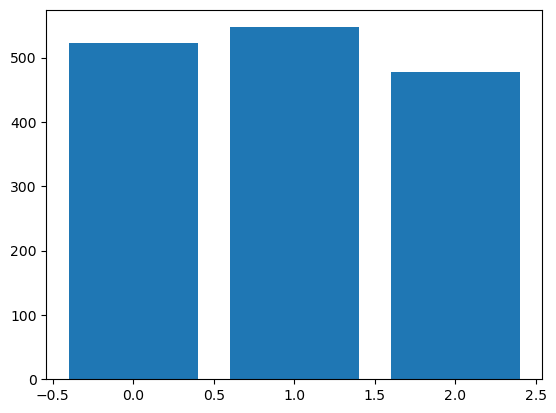

In [27]:
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [28]:
X.isna().sum()

Gender                           0
Age as of Academic Year 17/18    0
Current Year (17/18)             0
Year of Admission                0
Previous Curriculum (17/18)2     0
Current School                   0
Math-exam                        0
Science-exam'                    0
English-exam'                    0
Math19-1'                        0
Science19-1'                     0
English19-1'                     0
Math19-2'                        0
Science19-2'                     0
English19-2'                     0
Math19-3'                        0
Science19-3'                     0
English19-3'                     0
Math20-1'                        0
Science20-1'                     0
English20-1'                     0
Math20-2'                        0
Science20-2'                     0
English20-2'                     0
Math20-3'                        0
Science20-3'                     0
English20-3'                     0
dtype: int64

In [29]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# SMOTE-Tomek Links

This is a modified version of SMOTE. It combines the ability of both SMOTE and Tomek Links. SMOTE is capable of generating synthetic data for minority class. And, Tomek Links is able to remove the data that are identified as Tomek links from the majority class.

In [30]:
# Define SMOTE-Tomek Links
# resample=SMOTE()
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [31]:
counter = Counter(y)

Class=1, n=547 (34.188%)
Class=2, n=547 (34.188%)
Class=0, n=506 (31.625%)


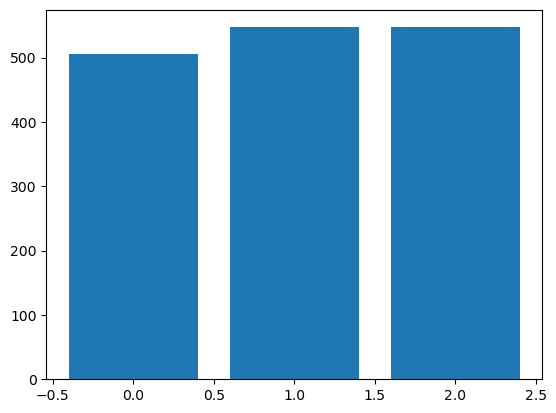

In [32]:
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20,
                                                    random_state =42)

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
RFclassifer = RandomForestClassifier()
RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
y_train_pred = RFclassifer.predict(X_train)
print('Train Accuracy %s' % RFclassifer.score(X_train, y_train))
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, RFclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy 1.0
Test Accuracy 0.809375
Precision Score :  0.809375
Recall Score :  0.809375
F1-Score Score :  0.809375
ROC AUC Score :  0.9969967030117256
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       101
           1       0.76      0.65      0.70       110
           2       0.80      0.91      0.85       109

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [35]:
RFclassifer.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

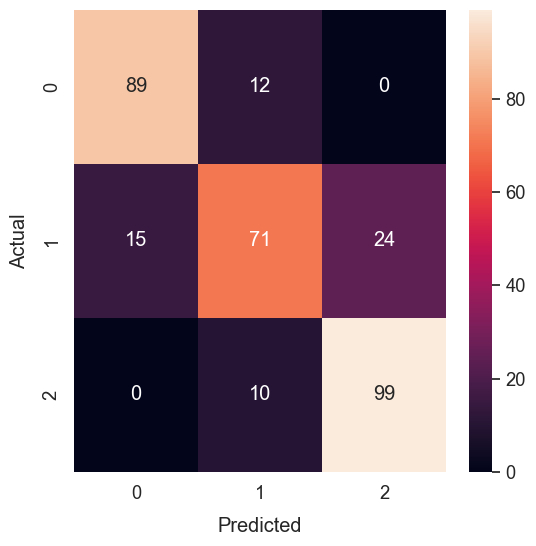

In [36]:
#importing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.2)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d'
)

ax.set_xlabel("Predicted", labelpad=10)
ax.set_ylabel("Actual", labelpad=10)
plt.show()

# Apply Random Search With RF

In [37]:
#creating Search Space
from scipy.stats import randint

random_forest_space = {
    'n_estimators': np.arange(1, 500, step=50),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'min_samples_split': np.arange(2, 10, step=2),
    'min_samples_leaf': randint(1, 4),
    'max_features': randint(1, 7)
}

In [38]:
#finding best hyperparameter
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, random_forest_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)

print('Best hyperparamete are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparamete are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 251}
Best score is: 0.7859375


In [39]:
# create a Random Forest Classifier object with the best hyperparameters
rf = RandomForestClassifier(**model_random.best_params_)

# fit the model on the training data
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
print('Train Accuracy : %s' % rf.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, rf.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 1.0
Test Accuracy : 0.784375
Precision Score :  0.784375
Recall Score :  0.784375
F1-Score Score :  0.784375
ROC AUC Score :  0.9973263645545041
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       101
           1       0.73      0.60      0.66       110
           2       0.79      0.92      0.85       109

    accuracy                           0.78       320
   macro avg       0.78      0.79      0.78       320
weighted avg       0.78      0.78      0.78       320



# Xgboost

In [40]:
from xgboost import XGBClassifier
XGclassifer = XGBClassifier()
XGclassifer.fit(X_train, y_train)
y_pred = XGclassifer.predict(X_test)
y_train_pred = XGclassifer.predict(X_train)
print('Train Accuracy : %s' % XGclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, XGclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 1.0
Test Accuracy : 0.8125
Precision Score :  0.8125
Recall Score :  0.8125
F1-Score Score :  0.8125
ROC AUC Score :  0.9975526621107701
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       101
           1       0.77      0.65      0.70       110
           2       0.86      0.93      0.89       109

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [41]:
XGclassifer.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# Apply Random Search With XGB

In [42]:
from scipy.stats import randint, uniform

xgboost_space = {
    'max_depth': randint(1, 11),
    'learning_rate': uniform(0.01, 0.5),
    'n_estimators': randint(50, 500),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

In [43]:
#finding best hyperparameter
from sklearn.model_selection import RandomizedSearchCV

XGB = XGBClassifier()
XGB_random = RandomizedSearchCV(XGB, xgboost_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
model_random = XGB_random.fit(X_train, y_train)

print('Best hyperparamete are: '+str(model_random.best_params_))
print('Best score is: '+str(model_random.best_score_))

Best hyperparamete are: {'colsample_bytree': 0.7466804758444323, 'gamma': 0.06069547481178694, 'learning_rate': 0.340525337091, 'max_depth': 1, 'min_child_weight': 4, 'n_estimators': 353, 'reg_alpha': 0.021629383391640777, 'reg_lambda': 0.6736444160889739, 'subsample': 0.7510356398839417}
Best score is: 0.859375


In [44]:
# create a Random Forest Classifier object with the best hyperparameters
XGB = XGBClassifier(**model_random.best_params_)

# fit the model on the training data
XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)
y_train_pred = XGB.predict(X_train)
print('Train Accuracy : %s' % XGB.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, XGB.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.9828125
Test Accuracy : 0.871875
Precision Score :  0.871875
Recall Score :  0.871875
F1-Score Score :  0.871875
ROC AUC Score :  0.9943082960949408
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       101
           1       0.89      0.72      0.79       110
           2       0.88      0.96      0.92       109

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



# SVM

In [45]:
from sklearn.svm import SVC
SVMclassifer = SVC(probability=True)
SVMclassifer .fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
y_train_pred = SVMclassifer.predict(X_train)
print('Train Accuracy : %s' % SVMclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, SVMclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.9484375
Test Accuracy : 0.940625
Precision Score :  0.940625
Recall Score :  0.940625
F1-Score Score :  0.940625
ROC AUC Score :  0.9954327401072492
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.92      0.91      0.91       110
           2       0.94      0.94      0.94       109

    accuracy                           0.94       320
   macro avg       0.94      0.94      0.94       320
weighted avg       0.94      0.94      0.94       320



In [46]:
SVMclassifer.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Apply Random Search With SVM

In [47]:
#creating Search Space
from scipy.stats import uniform, randint

svm_space = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + list(uniform.rvs(0.01, 1, size=5)),
    'coef0': uniform(-1, 1),
    'shrinking': [True, False]
}

In [48]:
#finding best hyperparameter
SVM = SVC()
SVMclassifier = RandomizedSearchCV(SVM, svm_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
SVMclassifier.fit(X_train, y_train)

print('Best hyperparameters are: '+str(SVMclassifier.best_params_))
print('Best score is: '+str(SVMclassifier.best_score_))

Best hyperparameters are: {'C': 8.176077701948866, 'coef0': -0.5127284290751727, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}
Best score is: 0.978125


In [49]:
# create a SVM Classifier object with the best hyperparameters
SVMclassifier = SVC(probability=True,**SVMclassifier.best_params_)

# fit the model on the training data
SVMclassifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = SVMclassifier.predict(X_test)

# compute evaluation metrics
print('Train Accuracy : %s' % SVMclassifier.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, SVMclassifier.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 1.0
Test Accuracy : 0.971875
Precision Score :  0.971875
Recall Score :  0.971875
F1-Score Score :  0.971875
ROC AUC Score :  0.9999670762770322
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       101
           1       0.98      0.94      0.96       110
           2       0.98      1.00      0.99       109

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



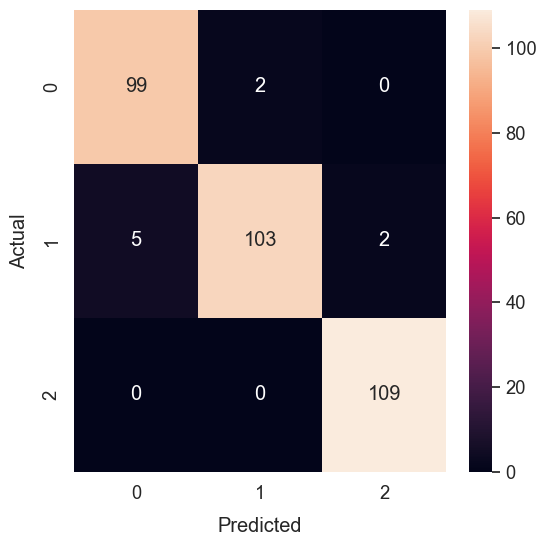

In [50]:
#importing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.set(font_scale = 1.2)

ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d'
)

ax.set_xlabel("Predicted", labelpad=10)
ax.set_ylabel("Actual", labelpad=10)
plt.show()

# Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
NBclassifer = MultinomialNB()
NBclassifer .fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
y_train_pred = NBclassifer.predict(X_train)
print('Train Accuracy : %s' % NBclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, NBclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.6046875
Test Accuracy : 0.60625
Precision Score :  0.60625
Recall Score :  0.60625
F1-Score Score :  0.60625
ROC AUC Score :  0.7831224850628007
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       101
           1       0.53      0.34      0.41       110
           2       0.66      0.78      0.72       109

    accuracy                           0.61       320
   macro avg       0.59      0.61      0.59       320
weighted avg       0.59      0.61      0.59       320



In [52]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

# Apply Random Search With NB

In [53]:
nb_space = {
    'alpha': uniform(0.01, 2.0),
    'fit_prior': [True, False],
}


In [54]:
#finding best hyperparameter
NBC = MultinomialNB()
NBClassifier = RandomizedSearchCV(NBC, nb_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
NBClassifier.fit(X_train, y_train)

print('Best hyperparameters are: '+str(NBClassifier.best_params_))
print('Best score is: '+str(NBClassifier.best_score_))

Best hyperparameters are: {'alpha': 1.8202133855641769, 'fit_prior': True}
Best score is: 0.5921875


In [55]:
# create a SVM Classifier object with the best hyperparameters
NBClassifier = MultinomialNB(**NBClassifier.best_params_)

# fit the model on the training data
NBClassifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = NBClassifier.predict(X_test)

# compute evaluation metrics
print('Train Accuracy : %s' % NBClassifier.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, NBClassifier.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.6046875
Test Accuracy : 0.60625
Precision Score :  0.60625
Recall Score :  0.60625
F1-Score Score :  0.60625
ROC AUC Score :  0.7830682193058438
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       101
           1       0.53      0.34      0.41       110
           2       0.66      0.78      0.72       109

    accuracy                           0.61       320
   macro avg       0.59      0.61      0.59       320
weighted avg       0.59      0.61      0.59       320



# AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ADBclassifer = AdaBoostClassifier()
ADBclassifer.fit(X_train, y_train)
y_pred = ADBclassifer.predict(X_test)
y_train_pred = ADBclassifer.predict(X_train)
print('Train Accuracy : %s' % ADBclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, ADBclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.8109375
Test Accuracy : 0.784375
Precision Score :  0.784375
Recall Score :  0.784375
F1-Score Score :  0.784375
ROC AUC Score :  0.8823727183246387
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       101
           1       0.64      0.87      0.74       110
           2       0.94      0.73      0.82       109

    accuracy                           0.78       320
   macro avg       0.82      0.78      0.79       320
weighted avg       0.82      0.78      0.79       320



In [57]:
ADBclassifer.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

# Apply Random Search With AdaBoost

In [58]:
adaboost_space = {
    'n_estimators': randint(50, 500),  # Number of estimators (weak learners)
    'learning_rate': uniform(0.01, 2.0),  # Learning rate for each weak learner
    'algorithm': ['SAMME', 'SAMME.R'],  # AdaBoost algorithm variant
}

In [59]:
#finding best hyperparameter
ADB = AdaBoostClassifier()
ADBClassifier = RandomizedSearchCV(ADB, adaboost_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
ADBClassifier.fit(X_train, y_train)

print('Best hyperparameters are: '+str(ADBClassifier.best_params_))
print('Best score is: '+str(ADBClassifier.best_score_))

Best hyperparameters are: {'algorithm': 'SAMME.R', 'learning_rate': 1.4981694735065, 'n_estimators': 379}
Best score is: 0.840625


In [60]:
# create a SVM Classifier object with the best hyperparameters
ADBClassifier = AdaBoostClassifier(**ADBClassifier.best_params_)

# fit the model on the training data
ADBClassifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = ADBClassifier.predict(X_test)

# compute evaluation metrics
print('Train Accuracy : %s' % ADBClassifier.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, ADBClassifier.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.9125
Test Accuracy : 0.853125
Precision Score :  0.853125
Recall Score :  0.853125
F1-Score Score :  0.853125
ROC AUC Score :  0.9413695623478454
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       101
           1       0.72      0.95      0.82       110
           2       0.95      0.83      0.89       109

    accuracy                           0.85       320
   macro avg       0.88      0.85      0.86       320
weighted avg       0.88      0.85      0.86       320



# Logistics Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LRclassifer = LogisticRegression()
LRclassifer.fit(X_train, y_train)
y_pred = LRclassifer.predict(X_test)
y_train_pred = LRclassifer.predict(X_train)
print('Train Accuracy : %s' % LRclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, LRclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.59453125
Test Accuracy : 0.596875
Precision Score :  0.596875
Recall Score :  0.596875
F1-Score Score :  0.596875
ROC AUC Score :  0.7756300678409856
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       101
           1       0.51      0.36      0.42       110
           2       0.66      0.72      0.69       109

    accuracy                           0.60       320
   macro avg       0.59      0.60      0.59       320
weighted avg       0.59      0.60      0.59       320



C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
LRclassifer.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Apply Random Search With LR

In [63]:
logreg_space = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.1, 10.0),
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'class_weight': [None, 'balanced'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'dual': [True, False],
}

In [64]:
#finding best hyperparameter
LRC= LogisticRegression()
LRClassifier = RandomizedSearchCV(LRC, logreg_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
LRClassifier.fit(X_train, y_train)

print('Best hyperparameters are: '+str(LRClassifier.best_params_))
print('Best score is: '+str(LRClassifier.best_score_))

C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1285 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
605 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 452, in _check_solver
    raise ValueError(

Best hyperparameters are: {'C': 10.023602577701057, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'max_iter': 400, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
Best score is: 0.928125


In [65]:
# create a SVM Classifier object with the best hyperparameters
LRClassifier = LogisticRegression(**LRClassifier.best_params_)

# fit the model on the training data
LRClassifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = LRClassifier.predict(X_test)

# compute evaluation metrics
print('Train Accuracy : %s' % LRClassifier.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, LRClassifier.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.94609375
Test Accuracy : 0.93125
Precision Score :  0.93125
Recall Score :  0.93125
F1-Score Score :  0.93125
ROC AUC Score :  0.9930943792035033
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       101
           1       0.99      0.81      0.89       110
           2       0.90      0.99      0.94       109

    accuracy                           0.93       320
   macro avg       0.94      0.93      0.93       320
weighted avg       0.94      0.93      0.93       320



# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
DTclassifer= DecisionTreeClassifier()
DTclassifer.fit(X_train, y_train)
y_pred = DTclassifer.predict(X_test)
y_train_pred = DTclassifer.predict(X_train)
print('Train Accuracy : %s' % DTclassifer.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, DTclassifer.predict_proba(X), 
                                       multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 1.0
Test Accuracy : 0.634375
Precision Score :  0.634375
Recall Score :  0.634375
F1-Score Score :  0.634375
ROC AUC Score :  0.9452747565598515
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       101
           1       0.50      0.48      0.49       110
           2       0.73      0.73      0.73       109

    accuracy                           0.63       320
   macro avg       0.63      0.64      0.63       320
weighted avg       0.63      0.63      0.63       320



In [67]:
DTclassifer.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Apply Random Search With DT

In [68]:
decision_tree_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(randint(1, 20).rvs(10)),
    'min_samples_split': randint(1, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [69]:
#finding best hyperparameter
DTC= DecisionTreeClassifier()
DTClassifier = RandomizedSearchCV(DTC, decision_tree_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5)
DTClassifier.fit(X_train, y_train)

print('Best hyperparameters are: '+str(DTClassifier.best_params_))
print('Best score is: '+str(DTClassifier.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 4, 'splitter': 'best'}
Best score is: 0.65234375


C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
165 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\ashri\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in

In [70]:
# create a SVM Classifier object with the best hyperparameters
DTClassifier = DecisionTreeClassifier(**DTClassifier.best_params_)

# fit the model on the training data
DTClassifier.fit(X_train, y_train)

# make predictions on the test set
y_pred = DTClassifier.predict(X_test)

# compute evaluation metrics
print('Train Accuracy : %s' % DTClassifier.score(X_train, y_train))
print('Test Accuracy : %s' % accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print("F1-Score Score : ",f1_score(y_test, y_pred, average='micro'))
print("ROC AUC Score : ",roc_auc_score(y, DTClassifier.predict_proba(X), multi_class='ovr'))
print(classification_report(y_test, y_pred))

Train Accuracy : 0.83984375
Test Accuracy : 0.675
Precision Score :  0.675
Recall Score :  0.675
F1-Score Score :  0.675
ROC AUC Score :  0.9323918056663203
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       101
           1       0.55      0.51      0.53       110
           2       0.75      0.79      0.77       109

    accuracy                           0.68       320
   macro avg       0.67      0.68      0.67       320
weighted avg       0.67      0.68      0.67       320



# Using explainable to explain the output of the ML Models

# SHAP

In [81]:
pip install shap --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import shap
# Create Tree Explainer object that can calculate shap values
explainer_shap = shap.TreeExplainer(rf)

In [83]:
print(X_test.index)

Int64Index([ 542,  991, 1325,  680, 1131, 1519,  256, 1068,  821, 1490,
            ...
            1432,  617, 1061,  827, 1327,  472, 1298, 1174,   66, 1404],
           dtype='int64', length=320)


In [84]:
X_test.loc[[991]]

,Gender,Age as of Academic Year 17/18,Current Year (17/18),Year of Admission,Previous Curriculum (17/18)2,Current School,Math-exam,Science-exam',English-exam',Math19-1',...,English19-3',Math20-1',Science20-1',English20-1',Math20-2',Science20-2',English20-2',Math20-3',Science20-3',English20-3'
991,0.0,7.0,0.0,0.0,0.0,1.0,75.0,62.5,72.5,62.3,...,73.3,100.0,61.7,84.5,67.3,90.8,81.4,80.2,91.3,85.6


In [85]:
# Calculate Shap values
choosen_instance = X_test.loc[[991]]
shap_values = explainer_shap.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], shap_values[1], choosen_instance)

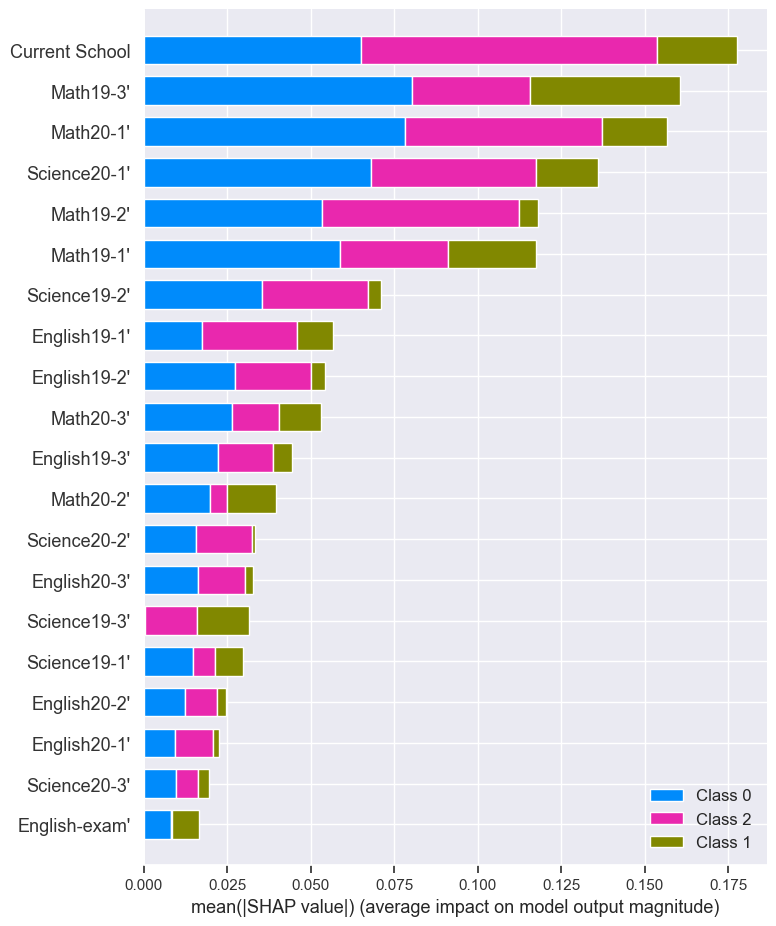

In [86]:
shap.summary_plot(shap_values, X_test.loc[[991]])

# LIME

In [77]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import lime
import lime.lime_tabular

In [79]:
#Creating Lime Object
predict_fn_rf = lambda x: SVMclassifier.predict_proba(x).astype(float)
X = X_train.values
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['0','1','2'],kernel_width=5)

In [80]:
# Calculate Lime values
choosen_instance = X_test.loc[[991]].values[0]
exp = explainer_lime.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

X does not have valid feature names, but SVC was fitted with feature names
